In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [173]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [174]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [175]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [176]:
train_data = train_data.dropna(subset=['Age'])

In [177]:
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [178]:
train_data['Sex'].value_counts()

Sex
male      453
female    261
Name: count, dtype: int64

In [179]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [180]:
survived_by_gender = train_data[train_data['Survived'] == 1].groupby('Sex').size()

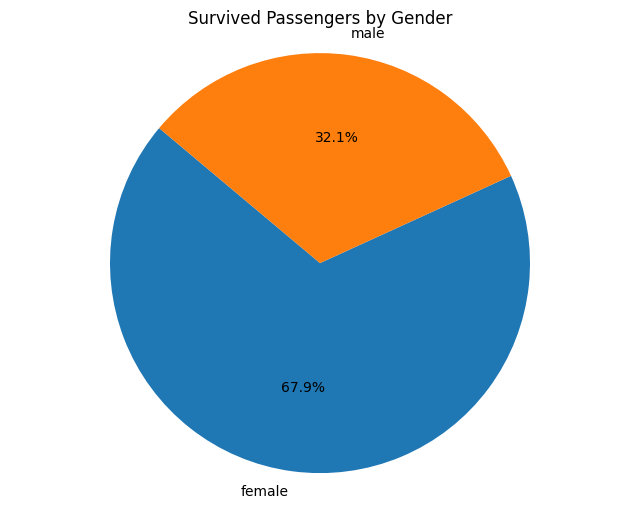

In [181]:
plt.figure(figsize=(8, 6))
plt.pie(survived_by_gender, labels=survived_by_gender.index, autopct='%1.1f%%', startangle=140)
plt.title('Survived Passengers by Gender')
plt.axis('equal')  
plt.show()

In [182]:
survived_by_pclass = train_data.groupby('Pclass')['Survived'].mean()

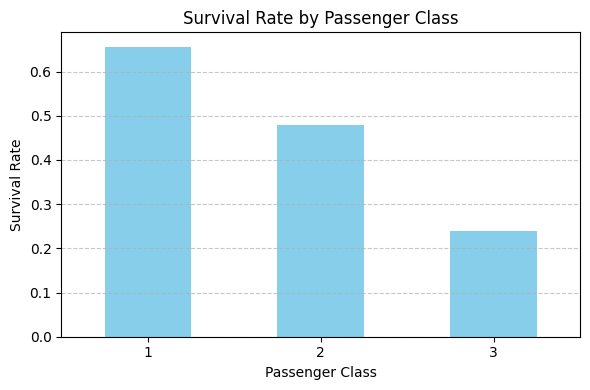

In [183]:
plt.figure(figsize=(6,4))
survived_by_pclass.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()

In [184]:
bins = [0, 18, 30, 50, 100]  # Define age group boundaries
labels = ['0-17', '18-29', '30-49', '50+']  # Define labels for age groups
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)
survived_by_age = train_data.groupby('AgeGroup')['Survived'].mean()

/tmp/ipykernel_34/519263122.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_age = train_data.groupby('AgeGroup')['Survived'].mean()


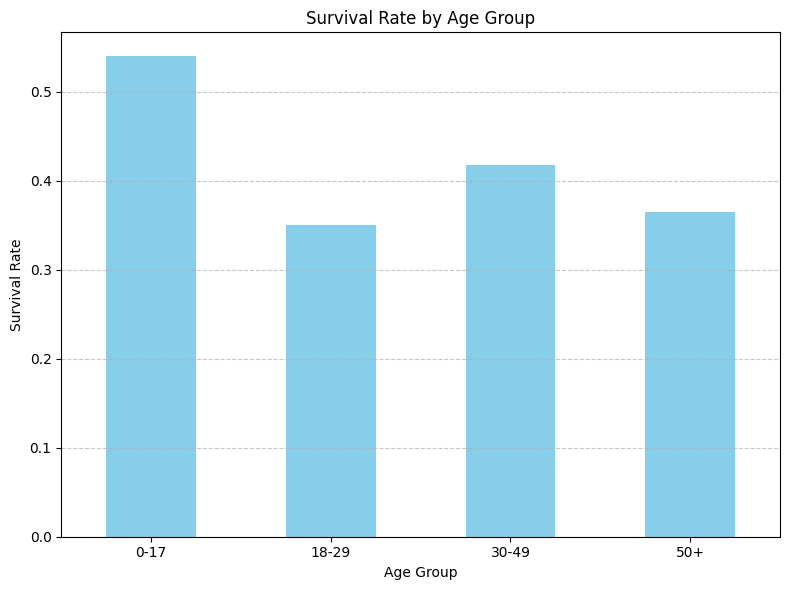

In [185]:
plt.figure(figsize=(8, 6))
survived_by_age.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()

Through logistic regression, we will understand how different factors interacted to determine who made it to safety and who succumbed to fate.

In [186]:
X = train_data[['Pclass', 'Sex', 'Age']]
y = train_data['Survived']

In [187]:
label_encoder = LabelEncoder()
X.loc[:, 'Sex'] = label_encoder.fit_transform(X['Sex'])

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [189]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [190]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [191]:
val_score = model.score(X_val, y_val)
print(f'Validation Accuracy is {val_score}')

Validation Accuracy is 0.7412587412587412


In [192]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [193]:
test_data = test_data.dropna(subset=['Age'])

test_data['Age'] = test_data['Age'].astype(int)

In [194]:
test_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.1500,NaN,S


In [195]:
X_test = test_data[['Pclass', 'Sex', 'Age']]
X_test.loc[:, 'Sex'] = label_encoder.transform(X_test['Sex'])
X_test

,Pclass,Sex,Age
0,3,1,34
1,3,0,47
2,2,1,62
3,3,1,27
4,3,0,22
...,...,...,...
409,3,0,3
411,1,0,37
412,3,0,28
414,1,0,39


In [196]:
X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)
test_data['Predicted Survived'] = predictions

In [197]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Predicted Survived
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37,1,0,19928,90.0000,C78,Q,1
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28,0,0,347086,7.7750,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,1


In [201]:
predicted_results = test_data[['PassengerId','Predicted Survived']].copy()
predicted_results.rename(columns={'Predicted Survived': 'Survived'}, inplace=True)

predicted_results.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [199]:
predicted_results.to_csv('predicted_results.csv', index=False)